> **DO NOT EDIT IF INSIDE annadl_f19 folder**


# Keras, overfitting, regularlization

- Part 3.1: Basic Keras
- Part 3.2: Regularization and overfitting

[**Feedback**]((https://ulfaslak.com/vent))

In [23]:
%matplotlib inline
%load_ext tensorboard
import matplotlib.pylab as plt
import numpy as np
import keras
import datetime
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Exercises

### Part 3.1: Basic Keras

> **Ex. 3.1.1** Let's get started with Keras by working with an actual neural network.
1. Implement a very simple `Sequential` model using [*Getting started with the Keras Sequential model*](https://keras.io/getting-started/sequential-model-guide/) as a guide.
2. Fit it to the [mnist](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset of handwritten digits that I have prepared below.
3. Compute the accuracy on the test set using the `evaluate` function.
4. BONUS: Can you score over 90% accuracy in just five training epochs?

In [24]:
(x, y), _ = keras.datasets.mnist.load_data()

# Reshape each image to 1dim vector. Effectively, reshape
# `x_train` from (60000, 28, 28) to (60000, 28*28)
x_train = x[:50000].reshape(-1, 28*28)
x_test = x[50000:].reshape(-1, 28*28)

# Convert y_train from vector of labels to one-hot encoding vector
y = keras.utils.to_categorical(y, num_classes=10)
y_train = y[:50000]
y_test = y[50000:]

In [25]:
#build model

image_size = 784 # 28*28 pixel input
num_classes = 10 # ten unique digits

model = Sequential()

#building layers
model.add(Dense(units=32, activation='sigmoid', input_dim = image_size))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()



model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy','mse'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [26]:
#train
hist = model.fit(x_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.0870 - accuracy: 0.2602 - mse: 0.0870
Epoch 2/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0757 - accuracy: 0.4152 - mse: 0.0757
Epoch 3/100
50000/50000 [==============================] - 1s 29us/step - loss: 0.0686 - accuracy: 0.5054 - mse: 0.0686
Epoch 4/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0636 - accuracy: 0.5661 - mse: 0.0636
Epoch 5/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0598 - accuracy: 0.6010 - mse: 0.0598
Epoch 6/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0566 - accuracy: 0.6295 - mse: 0.0566
Epoch 7/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0536 - accuracy: 0.6577 - mse: 0.0536
Epoch 8/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0508 - accuracy: 0.6811 - mse: 0.0508
Epoch 9/100
50000/50000 [===============

50000/50000 [==============================] - 1s 26us/step - loss: 0.0159 - accuracy: 0.9082 - mse: 0.0159
Epoch 69/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0158 - accuracy: 0.9090 - mse: 0.0158
Epoch 70/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0157 - accuracy: 0.9092 - mse: 0.0157
Epoch 71/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0156 - accuracy: 0.9091 - mse: 0.0156
Epoch 72/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0155 - accuracy: 0.9100 - mse: 0.0155
Epoch 73/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0154 - accuracy: 0.9107 - mse: 0.0154
Epoch 74/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.0154 - accuracy: 0.9107 - mse: 0.0154
Epoch 75/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0153 - accuracy: 0.9112 - mse: 0.0153
Epoch 76/100
50000/50000 [===================

In [5]:
#evaluate
metrics = model.evaluate(x_test, y_test)

print("loss, accuracy, mse")
print(metrics)

10000/10000 [==============================] - 0s 19us/step
loss, accuracy, mse
[0.07342372534275055, 0.4569999873638153, 0.07342375814914703]


In [6]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'loss'], loc='best')
plt.show()

NameError: name 'hist' is not defined

> **Ex. 3.1.2** One of the coolest features we get basically for free when using Keras with the Tensorflow backend is the **Tensorboard**.
It allows us to visualize training and test curves, our network graph, and more, in an interactive format.
Below I have implemented a simple linear regression, adapt and launch a visualization of the training performance.

In [18]:
x = np.linspace(-1, 1, 101)
y = 3 * x + np.random.randn(*x.shape) * 0.33

model = Sequential()

model.add(Dense(input_dim=1, units=1,  bias_initializer='uniform', activation='linear'))

In [19]:
log_dir="./logs/ex1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

In [20]:
model.compile(optimizer='sgd', 
              loss='mse',
              metrics=['accuracy','mse']
             )

model.fit(x, y, epochs=200, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/200
101/101 [==============================] - 0s 594us/step - loss: 2.4297 - accuracy: 0.0000e+00 - mse: 2.4297
Epoch 2/200
101/101 [==============================] - 0s 42us/step - loss: 2.2986 - accuracy: 0.0000e+00 - mse: 2.2986
Epoch 3/200
101/101 [==============================] - 0s 40us/step - loss: 2.1807 - accuracy: 0.0000e+00 - mse: 2.1807
Epoch 4/200
101/101 [==============================] - 0s 66us/step - loss: 2.0602 - accuracy: 0.0000e+00 - mse: 2.0602
Epoch 5/200
101/101 [==============================] - 0s 68us/step - loss: 1.9591 - accuracy: 0.0000e+00 - mse: 1.9591
Epoch 6/200
101/101 [==============================] - 0s 52us/step - loss: 1.8547 - accuracy: 0.0000e+00 - mse: 1.8547
Epoch 7/200
101/101 [==============================] - 0s 44us/step - loss: 1.7611 - accuracy: 0.0000e+00 - mse: 1.7611
Epoch 8/200
101/101 [==============================] - 0s 54us/step - loss: 1.6569 - accuracy: 0.0000e+00 - mse: 1.6569
Epoch 9/200
101/101 [==================

101/101 [==============================] - 0s 70us/step - loss: 0.1594 - accuracy: 0.0000e+00 - mse: 0.1594
Epoch 69/200
101/101 [==============================] - 0s 61us/step - loss: 0.1554 - accuracy: 0.0000e+00 - mse: 0.1554
Epoch 70/200
101/101 [==============================] - 0s 66us/step - loss: 0.1525 - accuracy: 0.0000e+00 - mse: 0.1525
Epoch 71/200
101/101 [==============================] - 0s 55us/step - loss: 0.1501 - accuracy: 0.0000e+00 - mse: 0.1501
Epoch 72/200
101/101 [==============================] - 0s 57us/step - loss: 0.1475 - accuracy: 0.0000e+00 - mse: 0.1475
Epoch 73/200
101/101 [==============================] - 0s 44us/step - loss: 0.1453 - accuracy: 0.0000e+00 - mse: 0.1453
Epoch 74/200
101/101 [==============================] - 0s 52us/step - loss: 0.1420 - accuracy: 0.0000e+00 - mse: 0.1420
Epoch 75/200
101/101 [==============================] - 0s 39us/step - loss: 0.1402 - accuracy: 0.0000e+00 - mse: 0.1402
Epoch 76/200
101/101 [=======================

101/101 [==============================] - 0s 65us/step - loss: 0.1019 - accuracy: 0.0000e+00 - mse: 0.1019
Epoch 136/200
101/101 [==============================] - 0s 41us/step - loss: 0.1018 - accuracy: 0.0000e+00 - mse: 0.1018
Epoch 137/200
101/101 [==============================] - 0s 61us/step - loss: 0.1016 - accuracy: 0.0000e+00 - mse: 0.1016
Epoch 138/200
101/101 [==============================] - 0s 35us/step - loss: 0.1016 - accuracy: 0.0000e+00 - mse: 0.1016
Epoch 139/200
101/101 [==============================] - 0s 52us/step - loss: 0.1015 - accuracy: 0.0000e+00 - mse: 0.1015
Epoch 140/200
101/101 [==============================] - 0s 40us/step - loss: 0.1016 - accuracy: 0.0000e+00 - mse: 0.1016
Epoch 141/200
101/101 [==============================] - 0s 37us/step - loss: 0.1014 - accuracy: 0.0000e+00 - mse: 0.1014
Epoch 142/200
101/101 [==============================] - 0s 50us/step - loss: 0.1013 - accuracy: 0.0000e+00 - mse: 0.1013
Epoch 143/200
101/101 [===============

In [48]:
%tensorboard --logdir logs/ex1

> **Ex. 3.1.3** Solve exercises 1.2.2 and 1.2.3 from week 1, but solve them using Keras.
> Comment on differences in speed (and outcome if you observe any).
You can for example use Tensorboard to inspect the training performance throught the training epochs.

In [42]:
# generate data

def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y



x, y = generate_X_linear()
x_nl, y_nl = generate_X_nonlinear()

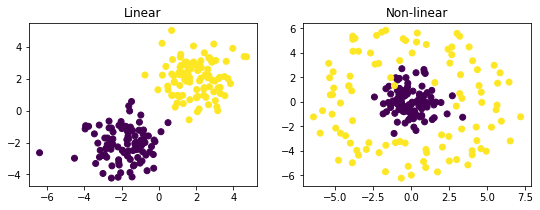

In [43]:
# visualize data
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.title("Linear", fontsize=12)
plt.scatter(x[:, 0], x[:, 1], c=list(y.reshape(-1)))

plt.subplot(1, 2, 2)
plt.title("Non-linear", fontsize=12)
plt.scatter(x_nl[:, 0], x_nl[:, 1], c=list(y.reshape(-1)))

plt.show()

In [46]:
#Linear data
model = Sequential()

#building layers
model.add(Dense(units=1, activation='sigmoid', input_dim = 2))
model.summary()

model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy','mse'])

log_dir="./logs/ex2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [47]:
#train
hist = model.fit(x, y, epochs=100, batch_size=50, callbacks=[tensorboard_callback])

Epoch 1/100
200/200 [==============================] - 0s 154us/step - loss: 0.0148 - accuracy: 0.9900 - mse: 0.0148
Epoch 2/100
200/200 [==============================] - 0s 35us/step - loss: 0.0147 - accuracy: 0.9900 - mse: 0.0147
Epoch 3/100
200/200 [==============================] - 0s 23us/step - loss: 0.0147 - accuracy: 0.9900 - mse: 0.0147
Epoch 4/100
200/200 [==============================] - 0s 23us/step - loss: 0.0146 - accuracy: 0.9900 - mse: 0.0146
Epoch 5/100
200/200 [==============================] - 0s 29us/step - loss: 0.0146 - accuracy: 0.9900 - mse: 0.0146
Epoch 6/100
200/200 [==============================] - 0s 19us/step - loss: 0.0146 - accuracy: 0.9900 - mse: 0.0146
Epoch 7/100
200/200 [==============================] - 0s 20us/step - loss: 0.0145 - accuracy: 0.9900 - mse: 0.0145
Epoch 8/100
200/200 [==============================] - 0s 40us/step - loss: 0.0145 - accuracy: 0.9900 - mse: 0.0145
Epoch 9/100
200/200 [==============================] - 0s 24us/step - l

200/200 [==============================] - 0s 26us/step - loss: 0.0124 - accuracy: 0.9900 - mse: 0.0124
Epoch 72/100
200/200 [==============================] - 0s 27us/step - loss: 0.0124 - accuracy: 0.9900 - mse: 0.0124
Epoch 73/100
200/200 [==============================] - 0s 25us/step - loss: 0.0123 - accuracy: 0.9900 - mse: 0.0123
Epoch 74/100
200/200 [==============================] - 0s 27us/step - loss: 0.0123 - accuracy: 0.9900 - mse: 0.0123
Epoch 75/100
200/200 [==============================] - 0s 28us/step - loss: 0.0123 - accuracy: 0.9900 - mse: 0.0123
Epoch 76/100
200/200 [==============================] - 0s 19us/step - loss: 0.0123 - accuracy: 0.9900 - mse: 0.0123
Epoch 77/100
200/200 [==============================] - 0s 29us/step - loss: 0.0122 - accuracy: 0.9900 - mse: 0.0122
Epoch 78/100
200/200 [==============================] - 0s 23us/step - loss: 0.0122 - accuracy: 0.9900 - mse: 0.0122
Epoch 79/100
200/200 [==============================] - 0s 25us/step - loss: 

In [49]:
%tensorboard --logdir logs/ex2

In [50]:
#Linear data
model = Sequential()

#building layers
model.add(Dense(units=3, activation='sigmoid', input_dim = 2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy','mse'])

log_dir="./logs/ex3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [51]:
#train
hist = model.fit(x_nl, y_nl, epochs=100, batch_size=50, callbacks=[tensorboard_callback])

Epoch 1/100
200/200 [==============================] - 0s 191us/step - loss: 0.2799 - accuracy: 0.5000 - mse: 0.2799
Epoch 2/100
200/200 [==============================] - 0s 35us/step - loss: 0.2794 - accuracy: 0.5000 - mse: 0.2794
Epoch 3/100
200/200 [==============================] - 0s 38us/step - loss: 0.2790 - accuracy: 0.5000 - mse: 0.2790
Epoch 4/100
200/200 [==============================] - 0s 35us/step - loss: 0.2785 - accuracy: 0.5000 - mse: 0.2785
Epoch 5/100
200/200 [==============================] - 0s 28us/step - loss: 0.2781 - accuracy: 0.5000 - mse: 0.2781
Epoch 6/100
200/200 [==============================] - 0s 24us/step - loss: 0.2776 - accuracy: 0.5000 - mse: 0.2776
Epoch 7/100
200/200 [==============================] - 0s 22us/step - loss: 0.2772 - accuracy: 0.5000 - mse: 0.2772
Epoch 8/100
200/200 [==============================] - 0s 26us/step - loss: 0.2767 - accuracy: 0.5000 - mse: 0.2767
Epoch 9/100
200/200 [==============================] - 0s 22us/step - l

200/200 [==============================] - 0s 33us/step - loss: 0.2574 - accuracy: 0.4950 - mse: 0.2574
Epoch 72/100
200/200 [==============================] - 0s 26us/step - loss: 0.2572 - accuracy: 0.4950 - mse: 0.2572
Epoch 73/100
200/200 [==============================] - 0s 31us/step - loss: 0.2570 - accuracy: 0.4950 - mse: 0.2570
Epoch 74/100
200/200 [==============================] - 0s 22us/step - loss: 0.2568 - accuracy: 0.4950 - mse: 0.2568
Epoch 75/100
200/200 [==============================] - 0s 34us/step - loss: 0.2566 - accuracy: 0.4900 - mse: 0.2566
Epoch 76/100
200/200 [==============================] - 0s 25us/step - loss: 0.2564 - accuracy: 0.4900 - mse: 0.2564
Epoch 77/100
200/200 [==============================] - 0s 40us/step - loss: 0.2562 - accuracy: 0.4900 - mse: 0.2562
Epoch 78/100
200/200 [==============================] - 0s 30us/step - loss: 0.2560 - accuracy: 0.4900 - mse: 0.2560
Epoch 79/100
200/200 [==============================] - ETA: 0s - loss: 0.234

In [52]:
%tensorboard --logdir logs/ex3

### Part 3.1: Overfitting and regularization

When a model *overfits* it means that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new unseen data. 
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 3.2.1** To understand overfitting, we overfit some data! Let's fit a neural network to data that has no inherent patterns: *noise*.

In [ ]:
# Generate some data-points
x = np.random.random(size=(50, 2))

# And some random outcomes
y = np.random.randint(0, 2, size=(50, ))

# Plot it
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

> Now, create a network that attains a an accuracy score over 80% in predicting which points are class 0 and which are class 1.
>
> *Hint*: The bigger the network, the bigger the overfitting.

> **Ex 3.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it, across the same number of batches, cannot overfit.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

> **Ex 3.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore).

> **Ex 3.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/layers/core/#dropout).